In [ ]:
#pip install seaborn
#pip install nltk


In [1]:
import numpy as np
import pandas as pd
import string

import nltk 
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve
import seaborn as sns 

# Password strength prediction classifiers

## Random Forest

### Preprocessing data

In [2]:
file = "---\\Kaggle - password strenght classifier\\password_data.csv"

# Initialize empty lists to store passwords and labels
passwords = []
labels = []

# Read the file line by line
with open(file, "r", encoding= "utf-8") as f:
    f.readline()  # skip the header line
    for line in f:
        # Split the line by the last comma
        password, label = line.rsplit(",", 1)
        
        # Append the extracted password and label to the lists
        passwords.append(password)
        labels.append(int(label.strip()))  # Convert label to integer and remove any extra spaces or newlines

# Create a pandas DataFrame
df = pd.DataFrame({
    "Password": passwords,
    "Label": labels
})

print(df)


            Password  Label
0           kzde5577      1
1           kino3434      1
2          visi7k1yr      1
3           megzy123      1
4        lamborghin1      1
...              ...    ...
669874    10redtux10      1
669875     infrared1      1
669876  184520socram      1
669877     marken22a      1
669878      fxx4pw4g      1

[669879 rows x 2 columns]


In [3]:
# download nltk's packages 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Feature engineering

In [4]:
# Basic Features
df['length'] = df['Password'].apply(len)
df['unique_chars'] = df['Password'].apply(lambda x: len(set(x)))

""" 
# PoS Tag Information
def get_pos_tags(password):
    words = word_tokenize(password)
    pos_tags = pos_tag(words)
    return [tag for word, tag in pos_tags]

df['pos_tags'] = df['Password'].apply(get_pos_tags)
"""

# Punctuation Count
df['punctuation_count'] = df['Password'].apply(lambda x: sum(1 for c in x if c in string.punctuation))

# Digit Count
df['digit_count'] = df['Password'].apply(lambda x: sum(1 for c in x if c.isdigit()))

# Contains Lowercase
df['contains_lowercase'] = df['Password'].apply(lambda x: any(c.islower() for c in x))

# Contains Uppercase
df['contains_uppercase'] = df['Password'].apply(lambda x: any(c.isupper() for c in x))



### Data visualization

In [5]:
df.head(10)

,Password,Label,length,unique_chars,punctuation_count,digit_count,contains_lowercase,contains_uppercase
0,kzde5577,1,8,6,0,4,True,False
1,kino3434,1,8,6,0,4,True,False
2,visi7k1yr,1,9,8,0,2,True,False
3,megzy123,1,8,8,0,3,True,False
4,lamborghin1,1,11,11,0,1,True,False
5,AVYq1lDE4MgAZfNt,2,16,15,0,2,True,True
6,u6c8vhow,1,8,8,0,2,True,False
7,v1118714,1,8,5,0,7,True,False
8,universe2908,1,12,11,0,4,True,False
9,as326159,1,8,8,0,6,True,False


Correlation matrix

C:\Users\User\AppData\Local\Temp\ipykernel_21192\1235409892.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


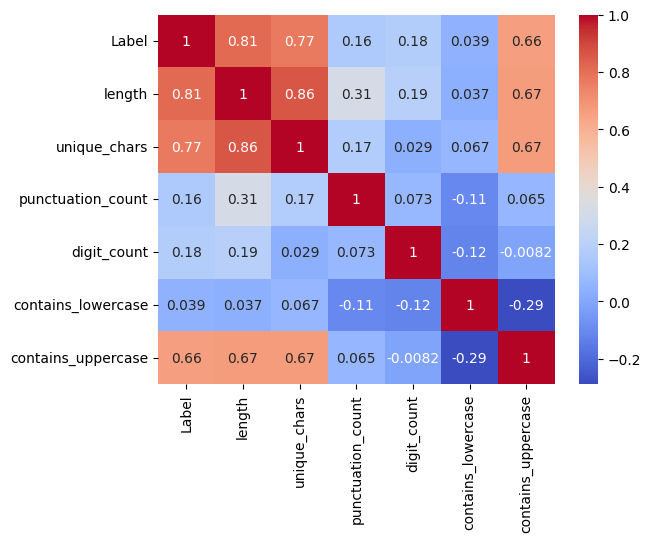

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [7]:
# count frequency of each label
class_counts = df['Label'].value_counts()

# total number of samples
total_samples = len(df)

# proportion of each class
class_proportion = class_counts / total_samples

print(f"Class Counts:\n{class_counts}")
print(f"Class Proportions:\n{class_proportion}")

Class Counts:
1    496801
0     89702
2     83376
Name: Label, dtype: int64
Class Proportions:
1    0.741628
0    0.133908
2    0.124464
Name: Label, dtype: float64


### Preparing data for the MODEL

In [8]:

X = df[['length', 'unique_chars', 'digit_count', 'punctuation_count', 'contains_lowercase', 'contains_uppercase']]
y = df['Label'] # strength before




Feature Importance from Tree-based Models

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by the importances
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df)


              Feature  Importance
0              length    0.615190
5  contains_uppercase    0.169620
1        unique_chars    0.159085
2         digit_count    0.028068
3   punctuation_count    0.014670
4  contains_lowercase    0.013367


Recursive feature elimination

In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=3)  # choose the top 3 features

# Fit RFE
fit = rfe.fit(X, y)

# Print the ranking
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

Num Features: 3
Selected Features: [ True False False False  True  True]
Feature Ranking: [1 4 3 2 1 1]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Train the model

In [12]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth= 4)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

### MAKE PREDICTIONS

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71708
           1       1.00      1.00      1.00    397399
           2       1.00      1.00      1.00     66797

    accuracy                           1.00    535904
   macro avg       1.00      1.00      1.00    535904
weighted avg       1.00      1.00      1.00    535904



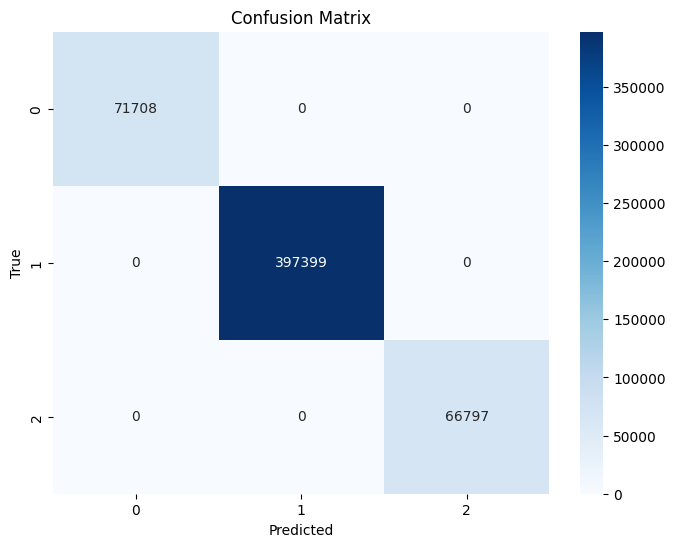

In [13]:
# Predict and evaluate
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [14]:
# Identify false positives and false negatives
eval_df = pd.DataFrame({
    'True_Labels': y_test,
    'Predicted_Labels': y_pred
})

false_negatives = eval_df[(eval_df['True_Labels'] == 1) & (eval_df['Predicted_Labels'] == 0)]
false_positives = eval_df[(eval_df['True_Labels'] == 0) & (eval_df['Predicted_Labels'] == 1)]

print("False Negatives:")
print(false_negatives)

print("False Positives:")
print(false_positives)


False Negatives:
Empty DataFrame
Columns: [True_Labels, Predicted_Labels]
Index: []
False Positives:
Empty DataFrame
Columns: [True_Labels, Predicted_Labels]
Index: []


### Check the level of security of your own password

In [ ]:
import pandas as pd
import string

# Assuming you have already defined your machine learning model 'clf'

# Function to preprocess and predict password strength
def predict_password_strength(password, model):
    length = len(password)
    unique_chars = len(set(password))
    
    # Calculate digit count
    digit_count = sum(1 for c in password if c.isdigit())
    
    # Calculate punctuation count
    punctuation_count = sum(1 for c in password if c in string.punctuation)
    
    # Check if password contains lowercase and uppercase characters
    contains_lowercase = any(c.islower() for c in password)
    contains_uppercase = any(c.isupper() for c in password)
    
    # Create a DataFrame with the features
    input_df = pd.DataFrame({
        'length': [length],
        'unique_chars': [unique_chars],
        'digit_count': [digit_count],
        'punctuation_count': [punctuation_count],
        'contains_lowercase': [contains_lowercase],
        'contains_uppercase': [contains_uppercase]
    })
    
    # Use the model to make a prediction
    prediction = model.predict(input_df)
    
    return prediction[0]

# Ask the user for a password
user_input = input("Please enter a password to check its strength: ")

# Predict the strength of the entered password
predicted_strength = predict_password_strength(user_input, clf)

# Output the result
print(f"The predicted strength of the password is: {predicted_strength}")


The predicted strength of the password is: 1


# Let's load more data and predict on it

preprocess both files

In [26]:

import csv
# Read the CSV file
file1 =  '---\\Kaggle - password strenght classifier\\data-common-pass.csv'

# Initialize empty lists to store passwords and labels
passwords = []
labels = []

# Read the file line by line
with open(file1, "r", encoding= "utf-8") as f:
    f.readline()  # skip the header line
    for line in f:
        # Split the line by the last comma
        password, label = line.rsplit(",", 1)
        
        # Append the extracted password and label to the lists
        passwords.append(password)
        labels.append(int(label.strip()))  # Convert label to integer and remove any extra spaces or newlines

# Create a pandas DataFrame
df1 = pd.DataFrame({
    "Password": passwords,
    "Label": labels
})

print(df1)


            Password  Label
0           kzde5577      1
1           kino3434      1
2          visi7k1yr      1
3           megzy123      1
4        lamborghin1      1
...              ...    ...
669874    10redtux10      1
669875     infrared1      1
669876  184520socram      1
669877     marken22a      1
669878      fxx4pw4g      1

[669879 rows x 2 columns]


In [27]:
file2 = "C:\\Users\\User\\OneDrive\\Desktop\\Kaggle - password strenght classifier\\top_200_password_2020_by_country.csv"

data = pd.read_csv(file2, encoding= "utf-8", sep = ",")

# Create the original DataFrame
df = pd.DataFrame(data)

# Create df2 with Password and Label columns
df2 = pd.DataFrame({'Password': df['Password']})

# Define a function to calculate the label
def calculate_label(time_to_crack_seconds):
    if time_to_crack_seconds < 1020:
        return 0
    elif 1020 <= time_to_crack_seconds <= 800000:
        return 1
    else:
        return 2

# Apply the function to calculate the Label column based on Time_to_crack_in_seconds
df2['Label'] = df['Time_to_crack_in_seconds'].apply(calculate_label)

# Display the resulting df2
print(df2)


       Password  Label
0        123456      0
1      password      0
2      lizottes      1
3     password1      0
4     123456789      0
...         ...    ...
9795   hongngoc      1
9796    anhtien      1
9797   lanhuong      1
9798   congacon      1
9799   conmemay      1

[9800 rows x 2 columns]


In [29]:

# Concatenate the DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)


679679

In [31]:
# 'Password' column 
combined_df['predicted_label'] = combined_df['Password'].apply(lambda x: predict_password_strength(x, clf))



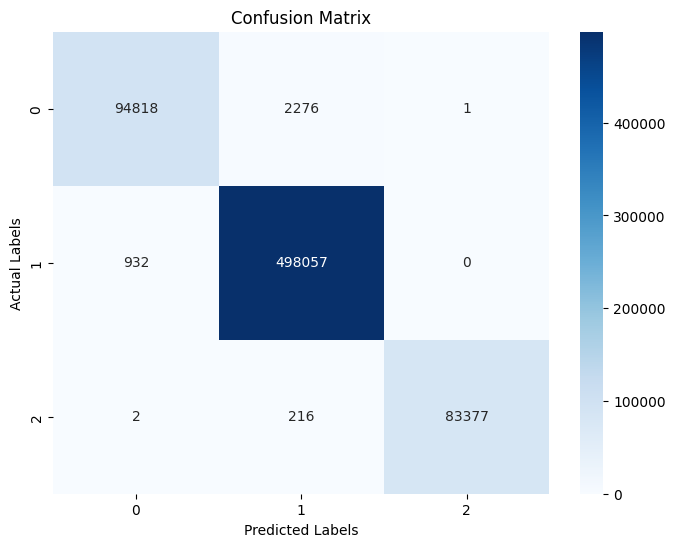

In [32]:
confusion_mat = confusion_matrix(combined_df['Label'], combined_df['predicted_label'])
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


In [33]:
print(classification_report(combined_df['Label'], combined_df['predicted_label']))



              precision    recall  f1-score   support

           0       0.99      0.98      0.98     97095
           1       1.00      1.00      1.00    498989
           2       1.00      1.00      1.00     83595

    accuracy                           0.99    679679
   macro avg       1.00      0.99      0.99    679679
weighted avg       0.99      0.99      0.99    679679



In [42]:
len(combined_df)

679679

In [35]:

# False negatives for class 0
false_negatives_class0 = combined_df[(combined_df['Label'] == 0) & (combined_df['predicted_label'] == 1)]

# False positives for class 0
false_positives_class0 = combined_df[(combined_df['Label'] == 1) & (combined_df['predicted_label'] == 0)]

# if you want them for the rest of the classes, repeat this process  for classes 1 and 2

In [41]:
print("--------------")
print("False negatives CLASS 0\n", false_negatives_class0[1:5])
print("\nFalse positives CLASS 0\n", false_positives_class0[1:5] )



--------------
False negatives CLASS 0
           Password  Label  predicted_label
669882   password1      0                1
669883   123456789      0                1
669887    12345678      0                1
669895  1234567890      0                1

False positives CLASS 0
        Password  Label  predicted_label
669927  william      1                0
669934  holden1      1                0
669942  jackson      1                0
669967  anthony      1                0
